Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex

Age	Age in years

sibsp	# of siblings / spouses aboard the Titanic

parch	# of parents / children aboard the Titanic

ticket	Ticket number

fare	Passenger fare

cabin	Cabin number

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [109]:
#importing the neccesarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
df= pd.read_csv("train.csv")

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
df.shape

(891, 12)

In [115]:
for i in df.columns:
  print(i,df[i].nunique())

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


In [116]:
# As we see PassengerId and Name has every value which is unique we drop it

df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [117]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [118]:
df['Cabin'].nunique()

147

In [119]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [120]:
df_features=df[[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked']]

In [121]:
df_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [122]:
df_features['Cabin'].isnull().sum()

687

In [123]:
#Since there are too many unique values in cabin name and the missing values are also too high dropping it
df_features.drop(columns='Cabin',inplace=True)

<ipython-input-123-063c82ab5196>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.drop(columns='Cabin',inplace=True)


In [124]:
df_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


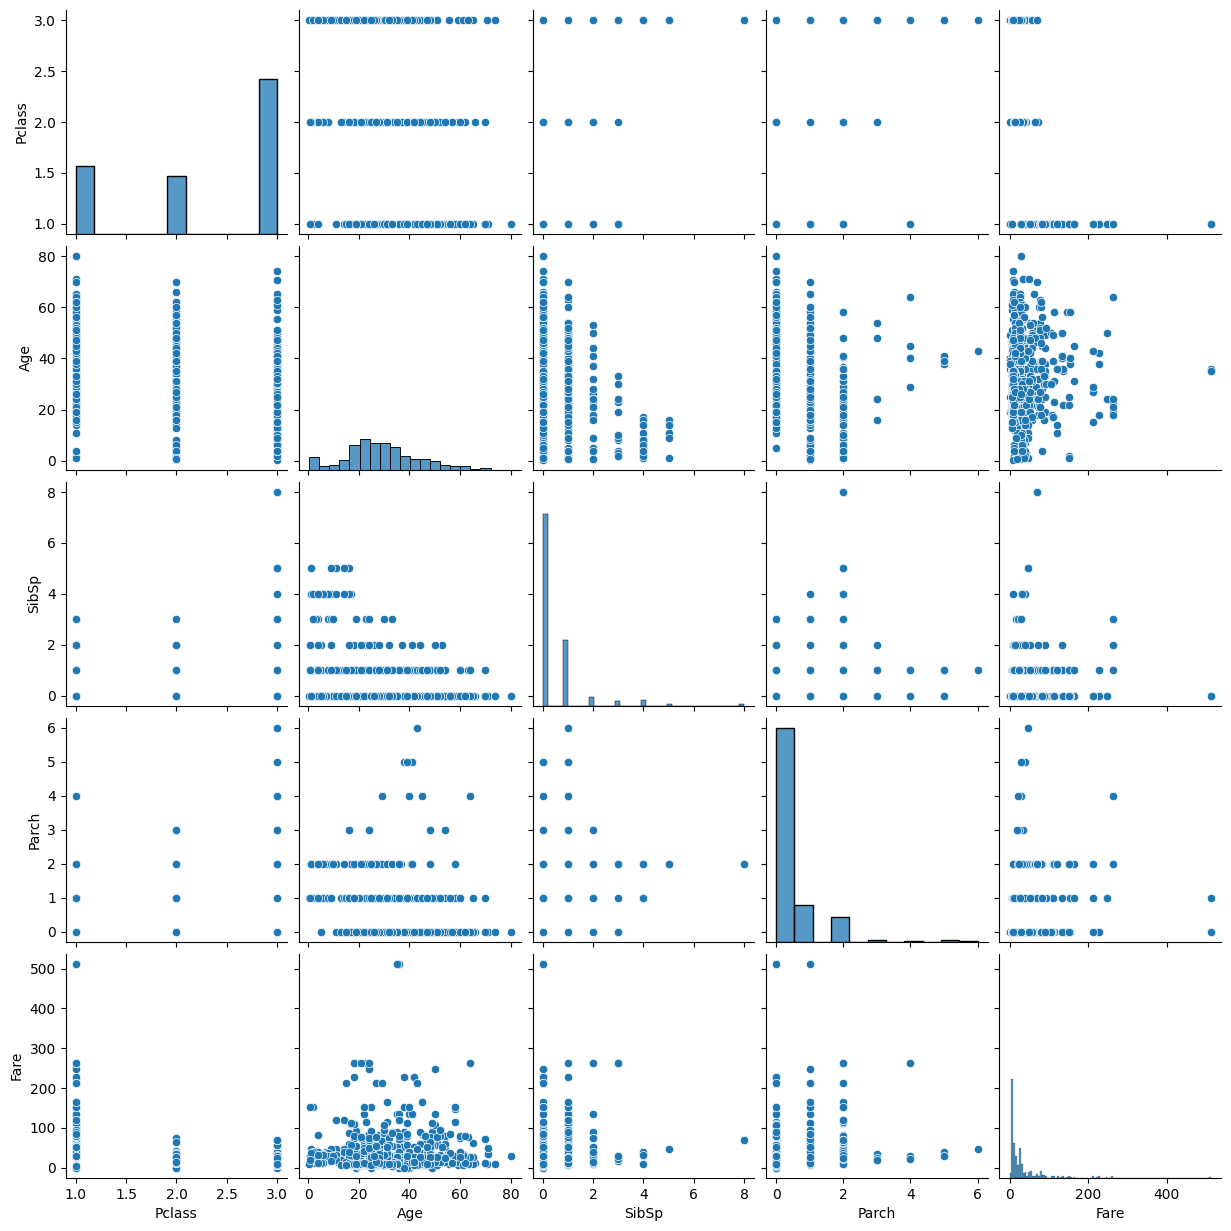

In [125]:
sns.pairplot(df_features)

In [126]:
df_features.fillna(method='backfill',inplace=True)
df_features.isnull().sum()

<ipython-input-126-03e4e739b785>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.fillna(method='backfill',inplace=True)


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [127]:
df_features[['Age','Fare']]=df_features[['Age','Fare']].astype(int)

<ipython-input-127-e0e78fb341d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[['Age','Fare']]=df_features[['Age','Fare']].astype(int)


In [128]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    891 non-null    int64 
 1   Sex       891 non-null    object
 2   Age       891 non-null    int64 
 3   SibSp     891 non-null    int64 
 4   Parch     891 non-null    int64 
 5   Fare      891 non-null    int64 
 6   Embarked  891 non-null    object
dtypes: int64(5), object(2)
memory usage: 48.9+ KB


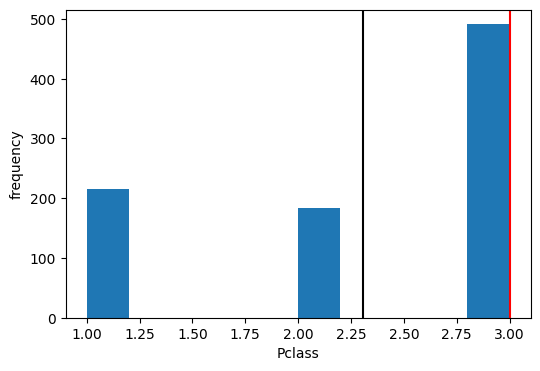

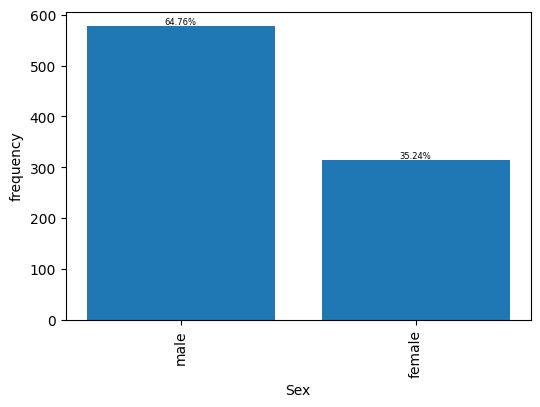

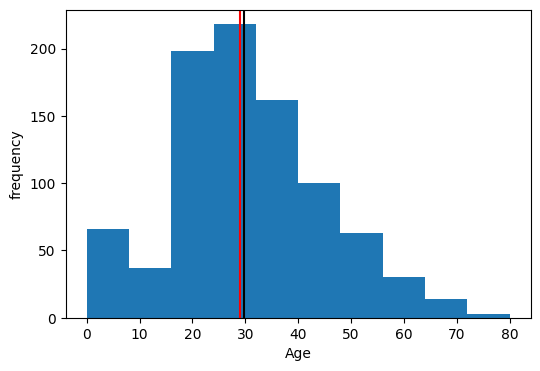

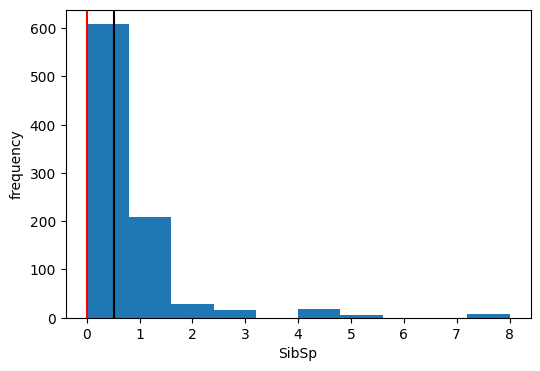

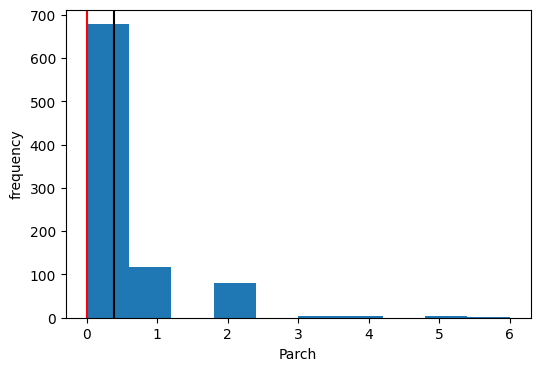

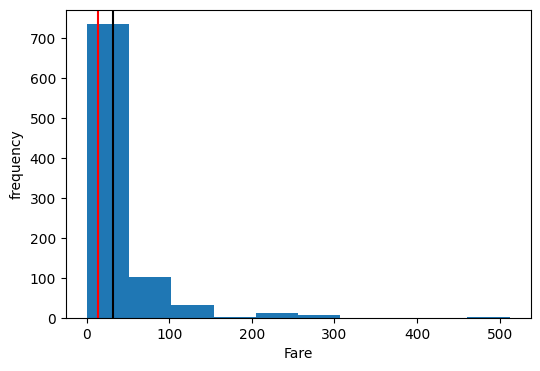

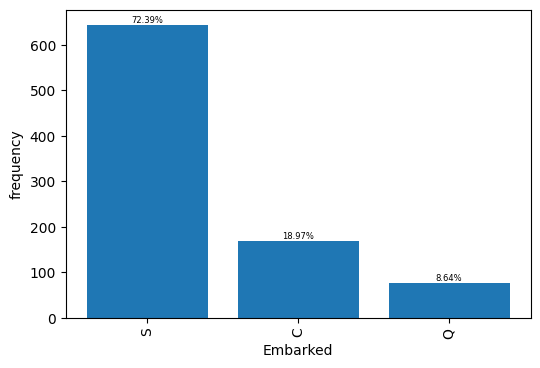

In [129]:
#plotting distribution graphs of all the columns
#histogram for numerical variables
#using hist function from matplotlib
#black line is mean
#red line is median
#bargraph for categorical variables
#using plt.bar function from matplotlib
for column in df_features:
  if(df_features[column].dtype == 'int64'):
    plt.figure(figsize=[6,4])
    plt.axvline(df_features[column].mean(), color='black')
    plt.axvline(df_features[column].median(),color='red')
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.hist(df_features[column])
  else:
    dictionary = dict(df_features[column].value_counts())
    keys=[]
    values=[]
    total=0
    for key in dictionary:
      values.append(dictionary[key])
      keys.append(key)
      total += dictionary[key]
    plt.figure(figsize=[6,4])
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.xticks(rotation=90)
    p1=plt.bar(keys,values)
    for rect1 in p1:
      height = rect1.get_height()
      plt.annotate("{}%".format(round(100*(height/total),2)), (rect1.get_x()+rect1.get_width()/2, height+0.05),ha="center",va="bottom",fontsize=6)


In [130]:
df_features.corr()

<ipython-input-130-b52e6d9f184c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_features.corr()


,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.295486,0.083081,0.018443,-0.550553
Age,-0.295486,1.000000,-0.204276,-0.161242,0.085800
SibSp,0.083081,-0.204276,1.000000,0.414838,0.159506
Parch,0.018443,-0.161242,0.414838,1.000000,0.216252
Fare,-0.550553,0.085800,0.159506,0.216252,1.000000


<ipython-input-131-c9c5c69468d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_features.corr())


<Axes: >

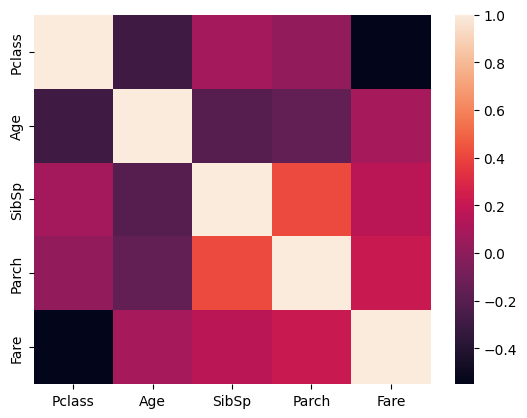

In [131]:
sns.heatmap(df_features.corr())

In [132]:
target=list(df['Survived'].value_counts())
target

[549, 342]

([<matplotlib.patches.Wedge at 0x7a9d0eceb070>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38')])

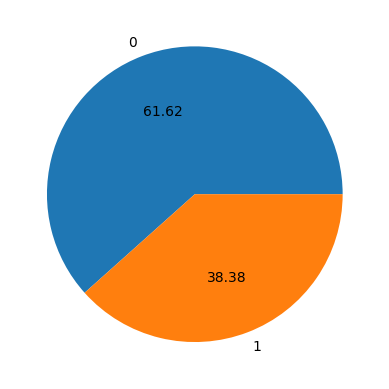

In [133]:
plt.pie(target,labels=[0,1],autopct='%.2f')

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test,y_train,y_test=train_test_split(df_features,df['Survived'],test_size=0.25,stratify=df['Survived'])

In [136]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 633 to 249
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    668 non-null    int64 
 1   Sex       668 non-null    object
 2   Age       668 non-null    int64 
 3   SibSp     668 non-null    int64 
 4   Parch     668 non-null    int64 
 5   Fare      668 non-null    int64 
 6   Embarked  668 non-null    object
dtypes: int64(5), object(2)
memory usage: 41.8+ KB


In [137]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 202 to 187
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    223 non-null    int64 
 1   Sex       223 non-null    object
 2   Age       223 non-null    int64 
 3   SibSp     223 non-null    int64 
 4   Parch     223 non-null    int64 
 5   Fare      223 non-null    int64 
 6   Embarked  223 non-null    object
dtypes: int64(5), object(2)
memory usage: 13.9+ KB


In [138]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [139]:
X_train=pd.get_dummies(X_train, columns = ['Sex'],drop_first=True)
X_train['Pclass']=LabelEncoder().fit_transform(X_train['Pclass'])
X_train=pd.get_dummies(X_train, columns = ['Embarked'])


In [140]:
X_test=pd.get_dummies(X_test, columns = ['Sex'],drop_first=True)
X_test['Pclass']=LabelEncoder().fit_transform(X_test['Pclass'])
X_test=pd.get_dummies(X_test, columns = ['Embarked'])


In [141]:
X_train.shape

(668, 9)

In [142]:
X_test.shape

(223, 9)

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100],
    'max_depth': [10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [144]:
from sklearn.metrics import classification_report

In [145]:
target_names = ['Not Survived', 'Survived']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.81      0.92      0.86       137
    Survived       0.84      0.65      0.73        86

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223



In [146]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[126  11]
 [ 30  56]]


In [147]:
from sklearn.ensemble import AdaBoostClassifier

In [148]:
abc =AdaBoostClassifier(n_estimators=100, base_estimator=rf,learning_rate=1)

In [149]:
model_ada = abc.fit(X_train, y_train)

y_pred_ada = model_ada.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [150]:
print(classification_report(y_test,y_pred_ada,target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.80      0.90      0.85       137
    Survived       0.80      0.65      0.72        86

    accuracy                           0.80       223
   macro avg       0.80      0.77      0.78       223
weighted avg       0.80      0.80      0.80       223



In [151]:
print(confusion_matrix(y_test,y_pred_ada))

[[123  14]
 [ 30  56]]


In [152]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(booster ='dart', objective="binary:logistic", random_state=42)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [153]:
y_pred_xg=xgb_model.predict(X_test)

In [154]:
print(classification_report(y_test,y_pred_xg,target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.79      0.90      0.84       137
    Survived       0.79      0.63      0.70        86

    accuracy                           0.79       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.79      0.79      0.79       223



In [155]:
print(confusion_matrix(y_test,y_pred_xg))

[[123  14]
 [ 32  54]]


In [156]:
test_df=pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [157]:
test_df[['Age','Fare']]=df_features[['Age','Fare']].astype(int)

In [158]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          418 non-null    int64 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int64 
 9   Cabin        91 non-null     object
 10  Embarked     418 non-null    object
dtypes: int64(6), object(5)
memory usage: 36.0+ KB


In [159]:
ST=test_df['PassengerId']

In [160]:
test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [161]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,0,0,7,Q
1,3,female,38,1,0,71,S
2,2,male,26,0,0,7,Q
3,3,male,35,0,0,53,S
4,3,female,35,1,1,8,S


In [162]:
test_df=pd.get_dummies(test_df, columns = ['Sex'],drop_first=True)
test_df['Pclass']=LabelEncoder().fit_transform(test_df['Pclass'])
test_df=pd.get_dummies(test_df, columns = ['Embarked'])

In [163]:
y_pred_1 = best_rf_model.predict(test_df)

In [164]:
y_pred_2=xgb_model.predict(test_df)

In [165]:
y_pred_3=model_ada.predict(test_df)

In [166]:
submission = pd.DataFrame({'PassengerId': ST, 'Survived':y_pred_1 })
submission.to_csv('submit.csv', sep=",", index=False)

In [167]:
submission = pd.DataFrame({'PassengerId': ST, 'Survived':y_pred_2 })
submission.to_csv('submitxgb.csv', sep=",", index=False)

In [168]:
submission = pd.DataFrame({'PassengerId': ST, 'Survived':y_pred_3 })
submission.to_csv('submitada.csv', sep=",", index=False)